<a href="https://colab.research.google.com/github/OscarIvaVP/Regresion.Logistica/blob/main/Produccion-Limitada-Competencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

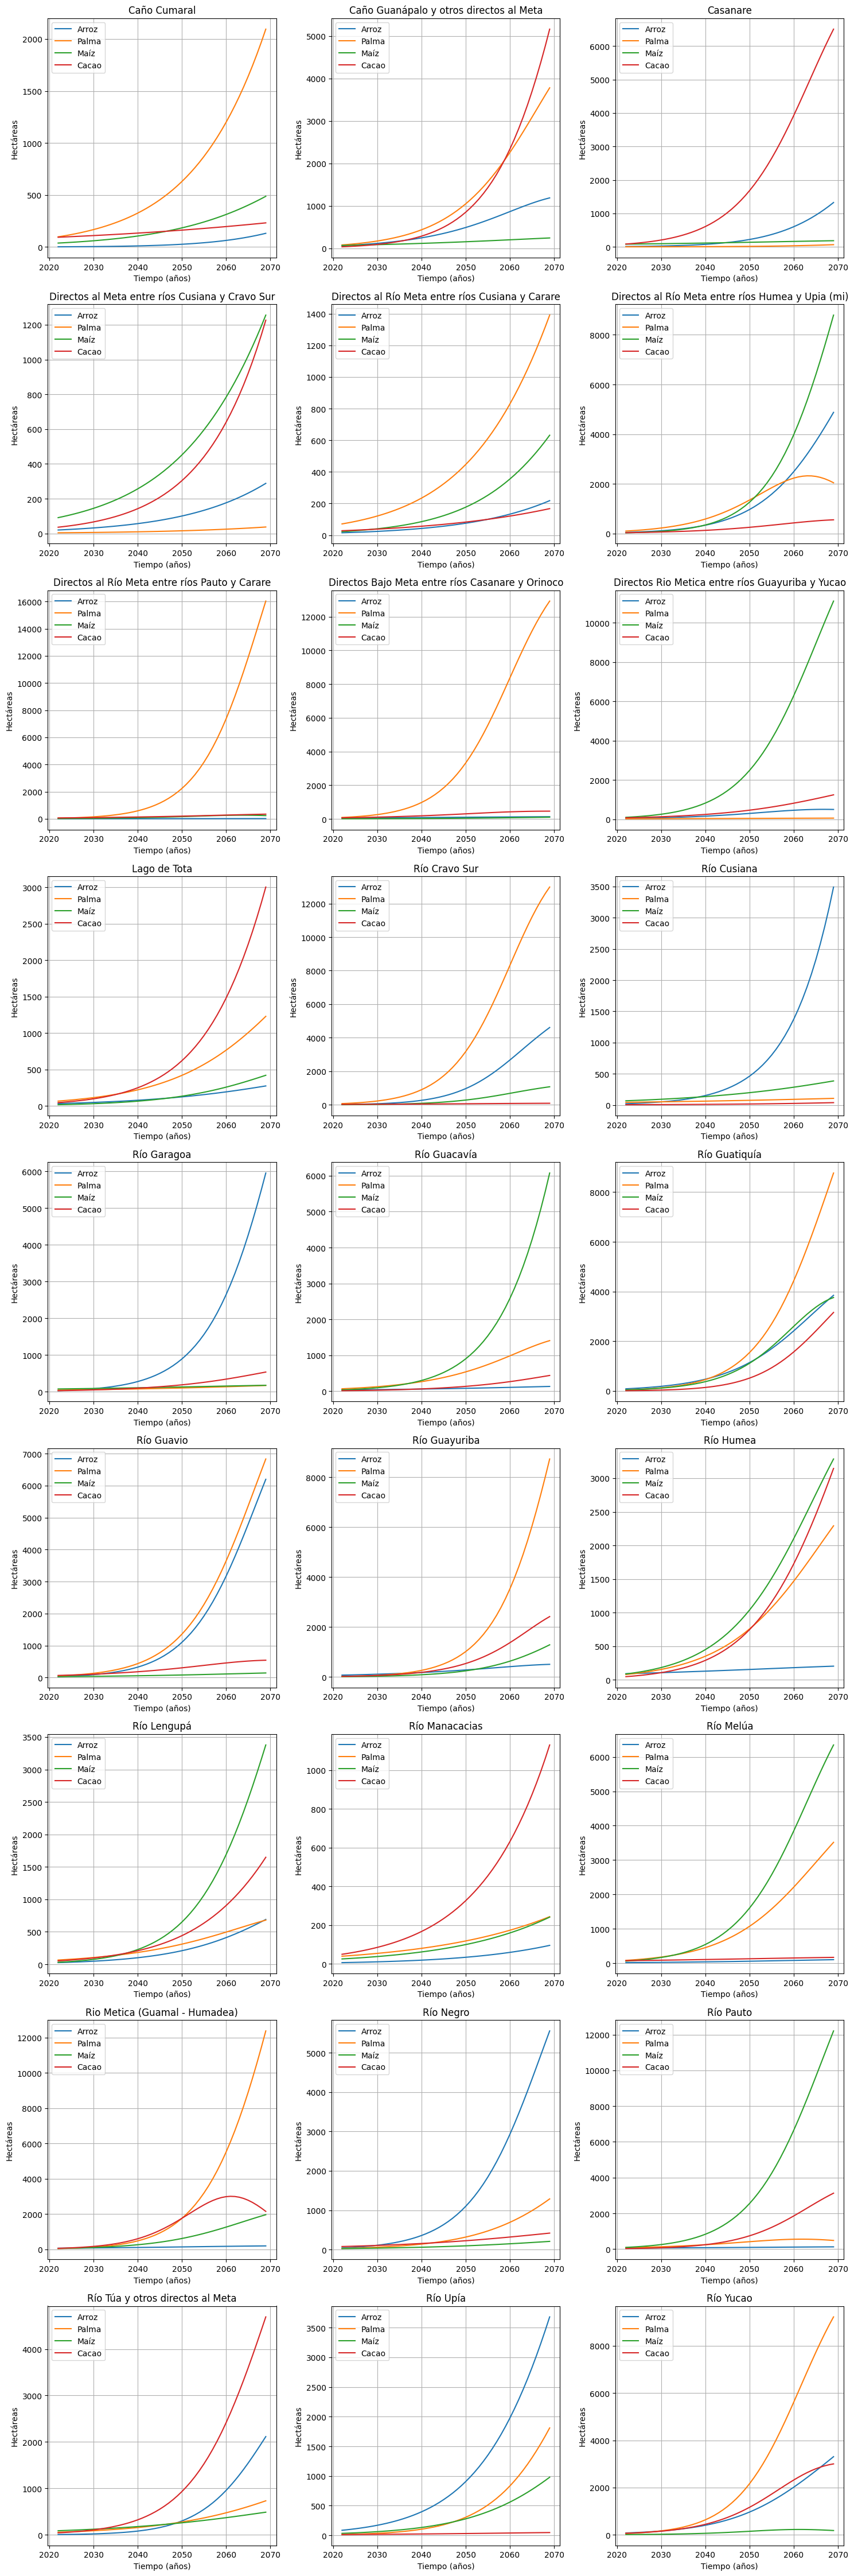

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer datos de Excel
#df_cultivos = pd.read_excel('ruta_al_archivo/datos_cultivos.xlsx', sheet_name='Cultivos')
df_cultivos = pd.read_excel('/content/drive/MyDrive/ENTREGABLES-FINALES-BANCO-MUNDIAL/CRECIMIENTO-LOGISTICO-CULTIVOS/datos_cultivos.xlsx', sheet_name='Cultivos')


# Procesar datos de cultivos
cultivos = {}
for index, row in df_cultivos.iterrows():
    cultivo = row['Cultivo']
    cuenca = row['Cuenca']
    r = row['Tasa de Crecimiento']
    P0 = row['Población Inicial']
    K = row['Capacidad Máxima']

    if cultivo not in cultivos:
        cultivos[cultivo] = {}
    cultivos[cultivo][cuenca] = {'r': r, 'P0': P0, 'K': K}

# Crear una lista de cuencas únicas
cuenca_list = df_cultivos['Cuenca'].unique()

# Parámetros y definiciones
dt = 1
time = np.arange(2022, 2070, dt)

# Función de crecimiento logístico
def logistic_growth(P, r, K):
    return r * P * (1 - (P/K))

# Simulación de crecimiento considerando la competencia entre cultivos
results_competition = {cultivo: {cuenca: np.zeros(len(time)) for cuenca in cuencas.keys()} for cultivo, cuencas in cultivos.items()}

# Inicialización de las poblaciones
for cultivo, cuencas in cultivos.items():
    for cuenca in cuencas.keys():
        results_competition[cultivo][cuenca][0] = cultivos[cultivo][cuenca]['P0']

for t in range(1, len(time)):
    for cuenca in cuenca_list:
        total_P = sum([results_competition[cultivo][cuenca][t-1] for cultivo in cultivos if cuenca in cultivos[cultivo]])
        for cultivo in cultivos:
            if cuenca in cultivos[cultivo]:
                r = cultivos[cultivo][cuenca]['r']
                K = cultivos[cultivo][cuenca]['K']
                P_prev = results_competition[cultivo][cuenca][t-1]
                dP = r * P_prev * (1 - total_P / K) * dt
                results_competition[cultivo][cuenca][t] = P_prev + dP

# Graficar resultados con competencia
num_rows = int(np.ceil(len(cuenca_list) / 3))

# Ajustar el tamaño de la figura para acomodar los subplots
plt.figure(figsize=(15, 5 * num_rows))

for idx, cuenca in enumerate(cuenca_list):
    # Calcular índices de fila y columna para el subplot
    row = idx // 3
    col = idx % 3
    ax = plt.subplot(num_rows, 3, idx+1)

    for cultivo in cultivos:
        if cuenca in cultivos[cultivo]:
            ax.plot(time, results_competition[cultivo][cuenca], label=cultivo)

    ax.set_title(f'{cuenca}')
    ax.set_xlabel('Tiempo (años)')
    ax.set_ylabel('Hectáreas')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()